In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Reading File

In [30]:
data = pd.read_csv('flight.csv') 
data.head()

,index,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Diagrams

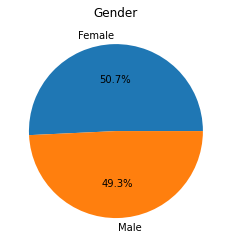

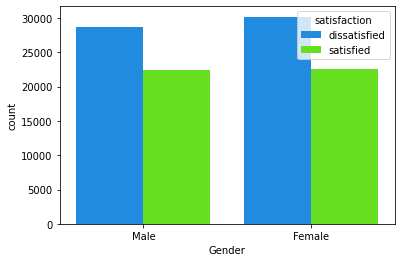

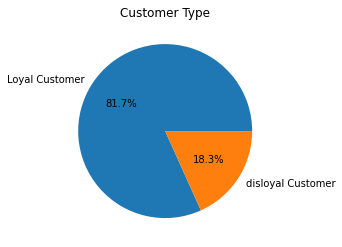

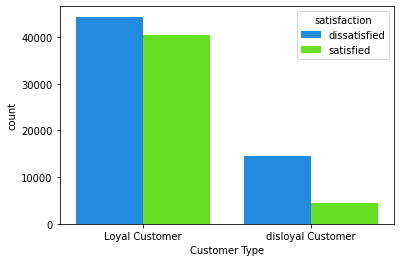

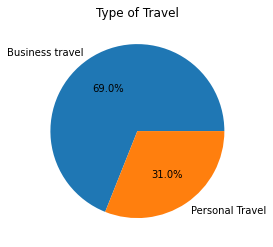

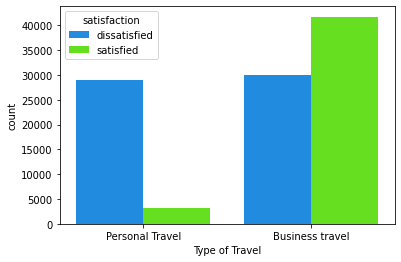

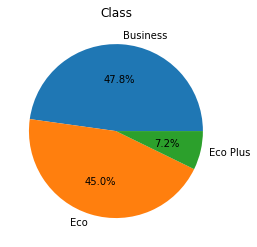

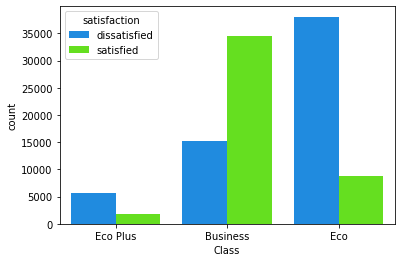

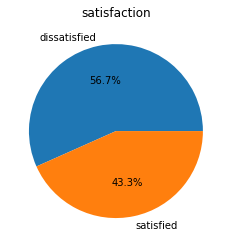

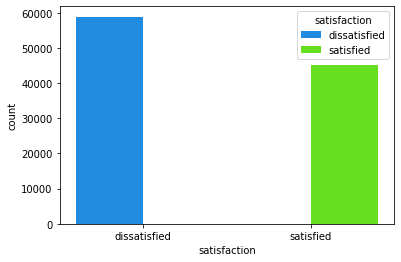

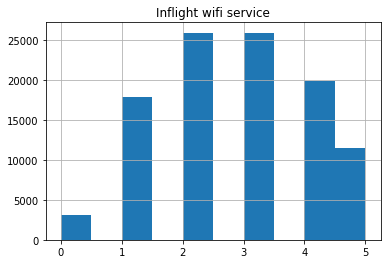

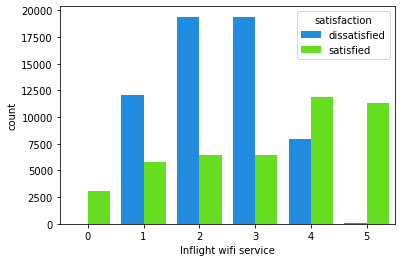

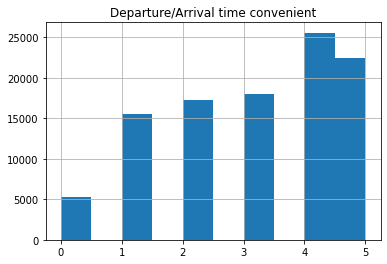

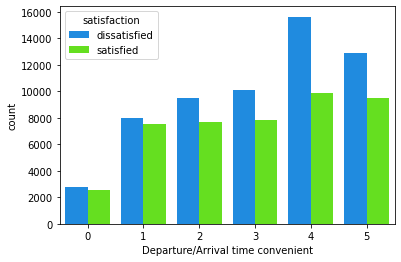

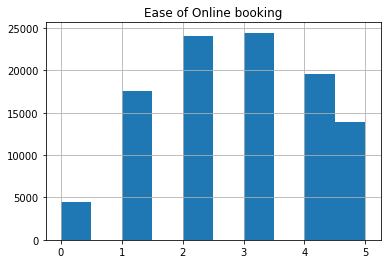

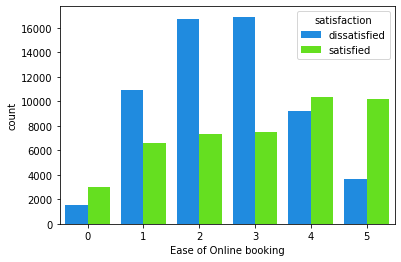

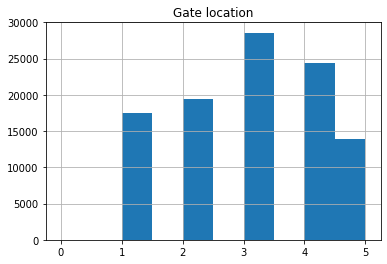

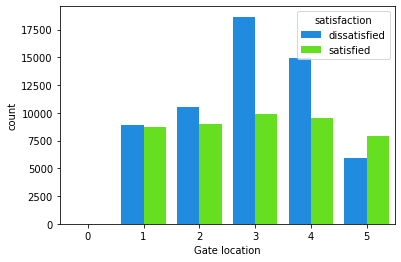

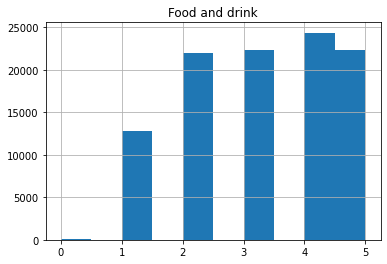

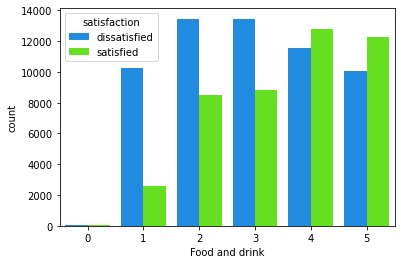

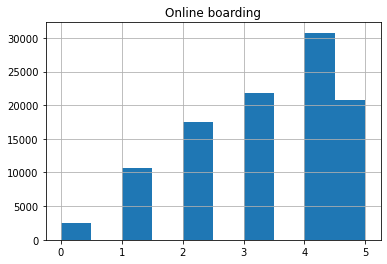

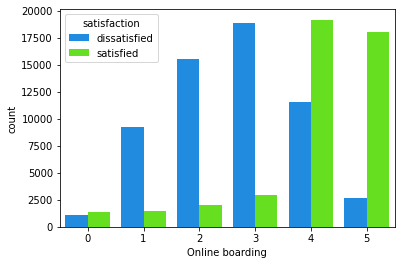

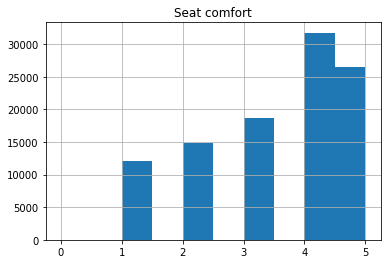

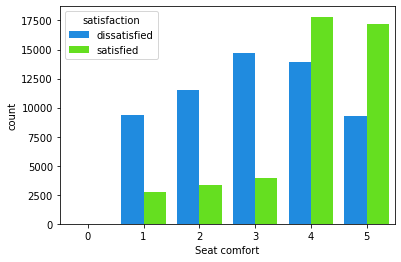

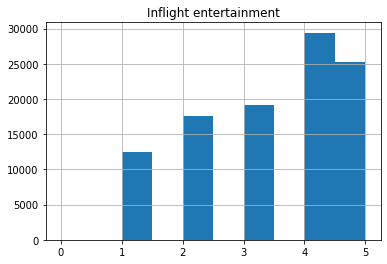

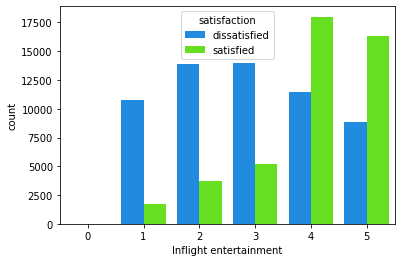

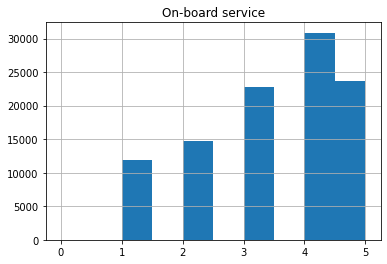

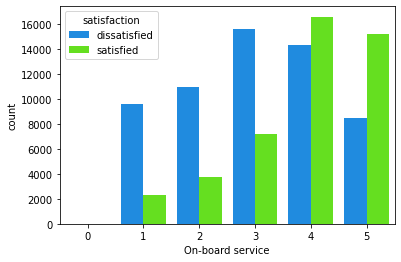

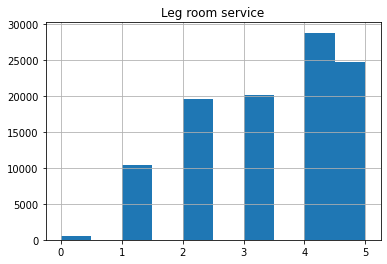

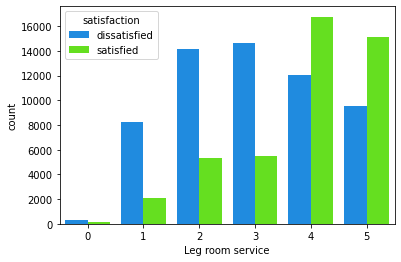

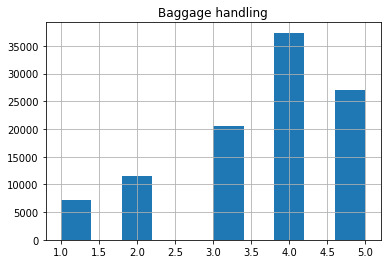

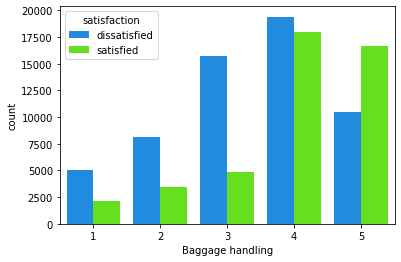

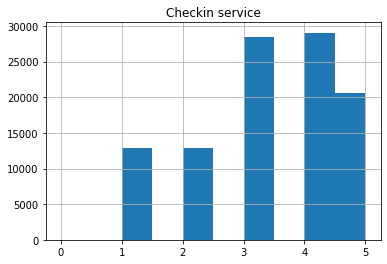

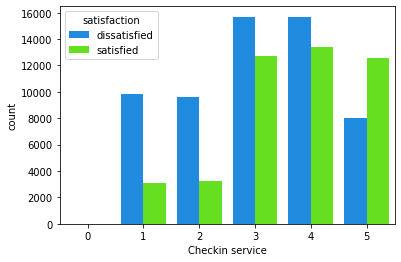

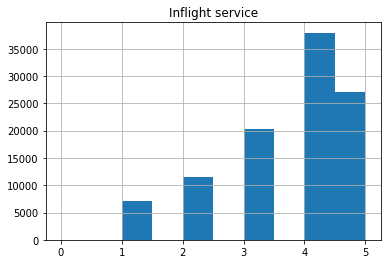

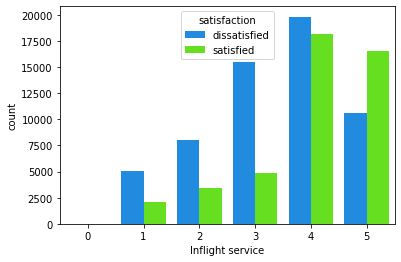

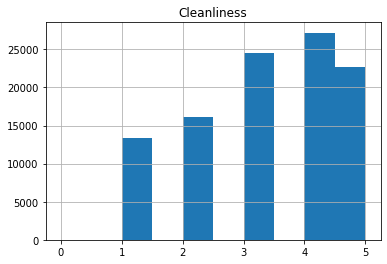

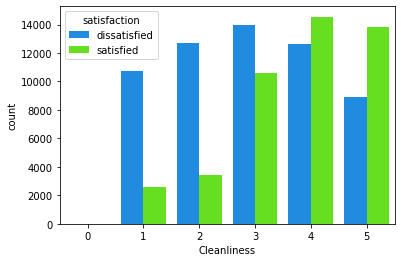

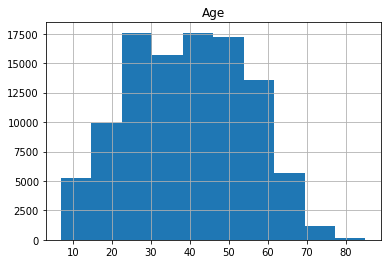

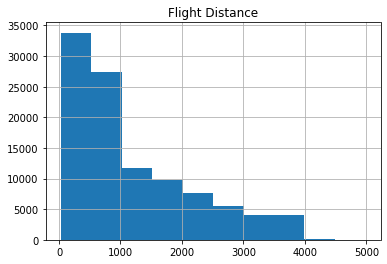

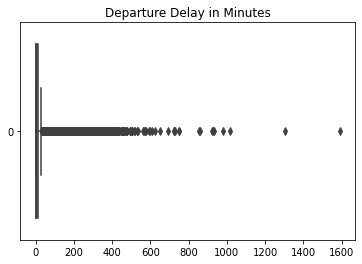

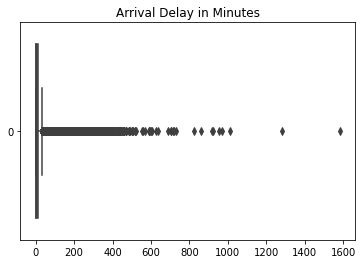

In [31]:
def show_pie_chart(data, column):
    dic = data[column].value_counts()
    plt.pie(dic.values, labels=dic.index.values, autopct='%1.1f%%')
    plt.title(column)
    plt.show()


def show_histogram_chart(data, column):
    data[column].hist()
    plt.title(column)
    plt.show()


def show_boxplot_chart(data, column):
    sns.boxplot(data=data[column], orient="h").set_title(column)
    plt.show()

def mixed_chart(data, column):
    sns.countplot(data=data, x=column, hue='satisfaction', palette='gist_rainbow_r')
    plt.show()


pie_columns_name = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
histogram_columns_name = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                          'Gate location',
                          'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                          'On-board service',
                          'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
continues_columns_name = ['Age', 'Flight Distance']
boxplot_columns_name = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

for col in pie_columns_name:
    show_pie_chart(data, col)
    mixed_chart(data, col)

for col in histogram_columns_name:
    show_histogram_chart(data, col)
    mixed_chart(data, col)

for col in continues_columns_name:
    show_histogram_chart(data, col)


for col in boxplot_columns_name:
    show_boxplot_chart(data, col)



# Preprocessing

## Detecting missing values

In [5]:
bool_series = pd.isnull(data["Arrival Delay in Minutes"])
print(data.isnull().sum())
data[bool_series].head()

index                                  0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

,index,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,2,2,3,11,NaN,dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,5,1,4,2,1,2,5,1,NaN,dissatisfied


## Replacing missing values with mean

In [6]:
data["Arrival Delay in Minutes"] = data["Arrival Delay in Minutes"].fillna(data['Arrival Delay in Minutes'].mean())
print(data.isnull().sum())
data.iloc[213]

index                                0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


index                                            213
id                                             49608
Gender                                        Female
Customer Type                         Loyal Customer
Age                                               38
Type of Travel                       Business travel
Class                                            Eco
Flight Distance                                  109
Inflight wifi service                              5
Departure/Arrival time convenient                  3
Ease of Online booking                             3
Gate location                                      3
Food and drink                                     5
Online boarding                                    5
Seat comfort                                       5
Inflight entertainment                             5
On-board service                                   5
Leg room service                                   2
Baggage handling                              

## Removing Index and ID columns

In [7]:
data = data.drop("index", axis=1)
data = data.drop("id", axis=1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Checking outliers with BoxPlot

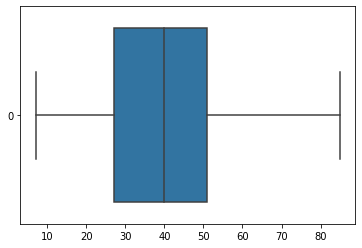

In [8]:
sns.boxplot(data=data["Age"], orient="h")

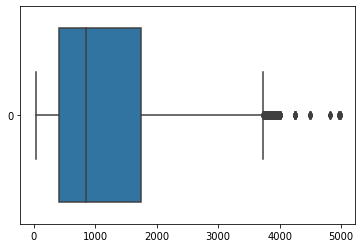

In [9]:
sns.boxplot(data=data["Flight Distance"], orient="h")

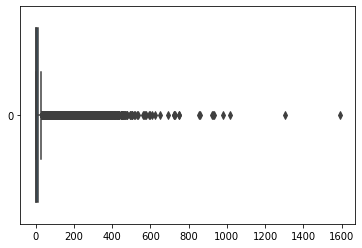

In [10]:
sns.boxplot(data=data["Departure Delay in Minutes"], orient="h")

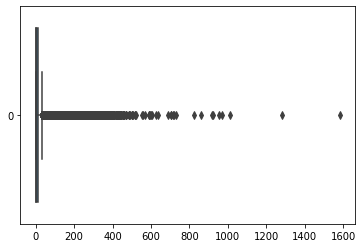

In [11]:
sns.boxplot(data=data["Arrival Delay in Minutes"], orient="h")

## Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

data["Gender"] = LabelEncoder().fit_transform(data["Gender"])
data["Customer Type"] = LabelEncoder().fit_transform(data["Customer Type"])
data["Type of Travel"] = LabelEncoder().fit_transform(data["Type of Travel"])
data["Class"] = LabelEncoder().fit_transform(data["Class"])
data["satisfaction"] = LabelEncoder().fit_transform(data["satisfaction"])

data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [13]:
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

## Visualizing correlations using HeatMap

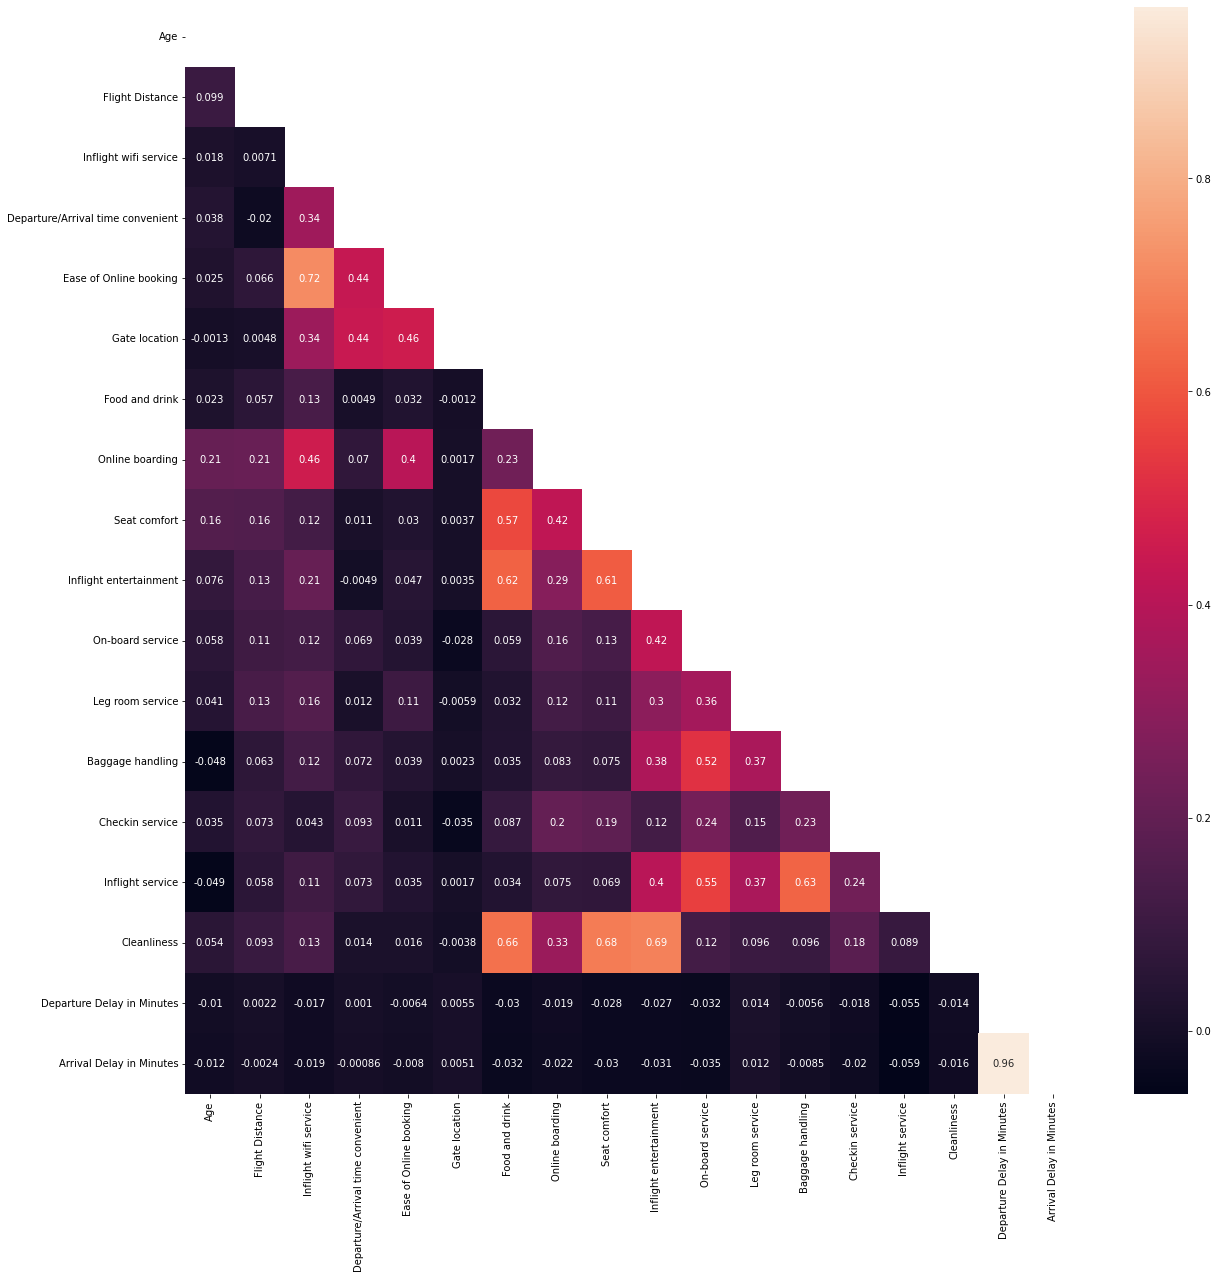

In [14]:
data_copy = data.drop(["Gender", "Customer Type", "Type of Travel", "Class", "satisfaction"], axis=1)
corr = data_copy.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(20,20)) 
# plotting correlation heatmap
dataplot = sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

### Removing "Arrival Delay in Minutes" Col because of high correlation

In [15]:
data = data.drop(['Arrival Delay in Minutes'], axis=1)
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,0


# Building Models

## 10-Fold Cross Validation method

In [19]:
from sklearn.model_selection import KFold
def crossValidation10Fold(model):
    acc_score = []
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(data):
        X_train2 , X_test2 = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train2 , y_test2 = y[train_index] , y[test_index]

        model.fit(X_train2,y_train2)
        pred_values = model.predict(X_test2)

        acc = accuracy_score(pred_values , y_test2)
        acc_score.append(acc)
    return sum(acc_score)/10

## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted_y = dt.predict(X_test)
list(predicted_y[:10]), list(y_test[:10])

([0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

#### Calculating the metrics

In [18]:
matrix = confusion_matrix(y_test, predicted_y)
tn, fp, fn, tp = matrix.ravel()

matrix, accuracy_score(y_test, predicted_y), precision_score(y_test, predicted_y), recall_score(y_test, predicted_y), f1_score(y_test, predicted_y),

(array([[11178,   598],
        [  523,  8482]]),
 0.9460564939127087,
 0.9341409691629956,
 0.9419211549139367,
 0.9380149294995852)

#### Evaluating the model using 10-Fold cross-valication

In [ ]:
crossValidation10Fold(dt)

0.9452860405498242

## Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predicted_y2 = gnb.predict(X_test)
list(predicted_y[:10]), list(y_test[:10])

([0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

#### Calculating the metrics

In [21]:
matrix = confusion_matrix(y_test, predicted_y)
tn, fp, fn, tp = matrix.ravel()

matrix, accuracy_score(y_test, predicted_y2), precision_score(y_test, predicted_y2), recall_score(y_test, predicted_y2), f1_score(y_test, predicted_y2),

(array([[11178,   598],
        [  523,  8482]]),
 0.8652134161012464,
 0.8649411764705882,
 0.816435313714603,
 0.8399885746929447)

#### Evaluating the model using 10-Fold cross-valication

In [22]:
crossValidation10Fold(gnb)

0.8641342858987414

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=16, random_state=0)
clf.fit(X_train, y_train)
predicted_y = clf.predict(X_test)
list(predicted_y[:10]), list(y_test[:10])

([0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

#### Calculating the metrics

In [24]:
matrix = confusion_matrix(y_test, predicted_y)
tn, fp, fn, tp = matrix.ravel()

matrix, accuracy_score(y_test, predicted_y), precision_score(y_test, predicted_y), recall_score(y_test, predicted_y), f1_score(y_test, predicted_y),

(array([[11521,   255],
        [  538,  8467]]),
 0.9618401424378038,
 0.9707635863334098,
 0.9402554136590783,
 0.9552659784509505)

#### Evaluating the model using 10-Fold cross-valication

In [25]:
crossValidation10Fold(clf)

0.960588626660982

#### Storing This Model

In [ ]:
import pickle
filename = 'RandomForestModel.sav'
pickle.dump(clf, open(filename, 'wb'))

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
predicted_y = neigh.predict(X_test)
list(predicted_y[:10]), list(y_test[:10])

([0, 0, 1, 0, 1, 1, 1, 1, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

#### Calculating the metrics

In [27]:
matrix = confusion_matrix(y_test, predicted_y)
tn, fp, fn, tp = matrix.ravel()

matrix, accuracy_score(y_test, predicted_y), precision_score(y_test, predicted_y), recall_score(y_test, predicted_y), f1_score(y_test, predicted_y),

(array([[9519, 2257],
        [3057, 5948]]),
 0.7442856455416005,
 0.7249238269347958,
 0.6605219322598557,
 0.6912260313771065)

#### Evaluating the model using 10-Fold cross-valication

In [28]:
crossValidation10Fold(neigh)

0.7489990643972735